In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import LabelEncoder

# Load Data

In [2]:
col = ['buying', 'maint', 'doors', 'persons','lug_boot','safety','acceptability']
df = pd.read_csv('carData.csv', names = col)
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
#encode qual data to quant
label = LabelEncoder()
df['buying'] = label.fit_transform(df['buying'])
df['maint'] = label.fit_transform(df['maint'])
df['doors'] = label.fit_transform(df['doors'])
df['persons'] = label.fit_transform(df['persons'])
df['lug_boot'] = label.fit_transform(df['lug_boot'])
df['safety'] = label.fit_transform(df['safety'])
df['acceptability'] = label.fit_transform(df['acceptability'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [4]:
X_and_Y = df.values
np.random.shuffle(X_and_Y)
X = X_and_Y[:,1:]
Y = X_and_Y[:,0]

print(X.shape)
print(Y.shape)

(1728, 6)
(1728,)


In [5]:
#establish training and test data in 20/50/80 partition

#1 = 0.2
#2 = 0.5
#3 = 0.8

X_train1 = X[:int(0.2*len(X))]
X_test1 = X[int(0.2*len(X)):]

Y_train1 = Y[:int(0.2*len(Y))]
Y_test1 = Y[int(0.2*len(Y)):]

print(X_train1.shape, X_test1.shape, Y_train1.shape, Y_test1.shape)


X_train2 = X[:int(0.5*len(X))]
X_test2 = X[int(0.5*len(X)):]

Y_train2 = Y[:int(0.5*len(Y))]
Y_test2 = Y[int(0.5*len(Y)):]

print(X_train2.shape, X_test2.shape, Y_train2.shape, Y_test2.shape)


X_train3 = X[:int(0.8*len(X))]
X_test3 = X[int(0.8*len(X)):]

Y_train3 = Y[:int(0.8*len(Y))]
Y_test3 = Y[int(0.8*len(Y)):]

print(X_train3.shape, X_test3.shape, Y_train3.shape, Y_test3.shape)

(345, 6) (1383, 6) (345,) (1383,)
(864, 6) (864, 6) (864,) (864,)
(1382, 6) (346, 6) (1382,) (346,)


In [6]:
def heatmap(training_acc, gamma, C_list):
    plt.figure(figsize = (1,5))
    ax = sns.heatmap(training_acc, annot = True, fmt = '.3f', xticklabels = 7, yticklabels = C_list)
    ax.collections[0].colorbar.set_label("Accuracy")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title('Training Accuracy w.r.t $C$ and $\gamma$')
    plt.show()

## KNN

In [7]:
#knn classifier using train/test #1

def knn(X_train,Y_train,X_test,Y_test):
    K_list = [1,2,3,4,5,6,7]     #6 features in data
    clf = GridSearchCV(KNeighborsClassifier(n_neighbors=6), iid= False, param_grid = {'n_neighbors':K_list}, cv = 5, return_train_score = True)
    clf.fit(X_train,Y_train)
    
    heatmap(clf.cv_results_['mean_train_score'].reshape(7,1), 'KNN Training Accuracy', K_list)
    
    opt_k = clf.best_params_['n_neighbors']
    
    clf_test = KNeighborsClassifier(n_neighbors=opt_k)
    clf_test.fit(X_train,Y_train)
    
    knn_accuracy = clf_test.score(X_test,Y_test)
    training_acc = clf.cv_results_['mean_train_score']
    for x,y in enumerate(K_list):
        if y == opt_k:
            opt_training_acc = training_acc[x]
            
    return knn_accuracy, opt_training_acc, opt_k

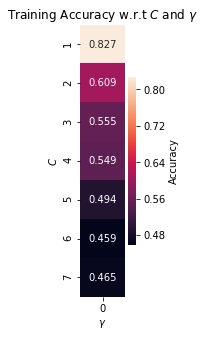

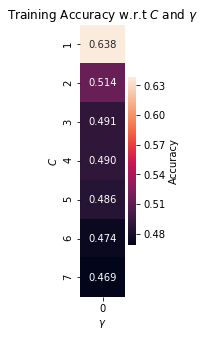

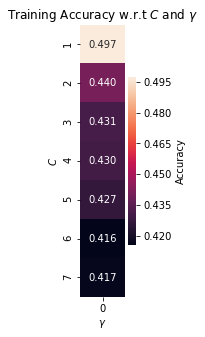

In [8]:
test_acc_KNN1,best_train_KNN1,C_KNN1 = knn(X_train1,Y_train1,X_test1,Y_test1)
test_acc_KNN2,best_train_KNN2,C_KNN2 = knn(X_train2,Y_train2,X_test2,Y_test2)
test_acc_KNN3,best_train_KNN3,C_KNN3 = knn(X_train3,Y_train3,X_test3,Y_test3)

## Decision Tree

In [9]:
def decisionTree(X_train,Y_train,X_test,Y_test):
    D_list = [1,2,3,4,5,6,7]
    
    clf = GridSearchCV(DecisionTreeClassifier(criterion='entropy'),cv=5,iid = False, param_grid = {'max_depth':D_list}, return_train_score = True)
    clf.fit(X_train,Y_train)
    heatmap(clf.cv_results_['mean_train_score'].reshape(7,1),'Decision Tree Training Accuracy', D_list)
    
    opt_D = clf.best_params_['max_depth']
    clf_test = DecisionTreeClassifier(max_depth=opt_D, criterion='entropy')
    
    clf_test.fit(X_train,Y_train)
    
    tree_accuracy = clf_test.score(X_test,Y_test)
    
    train_accuracy = clf.cv_results_['mean_train_score']
    
    for x,y in enumerate(D_list):
        if y == opt_D:
            best_train_accuracy = train_accuracy[x]
            
    return tree_accuracy, best_train_accuracy, opt_D

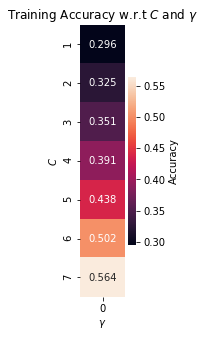

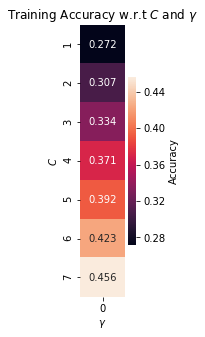

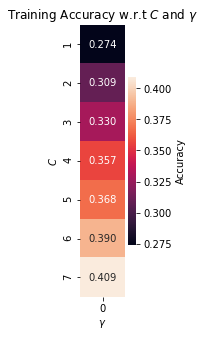

In [10]:
tree_acc1, tree_train_acc1, opt_D1 = decisionTree(X_train1,Y_train1,X_test1,Y_test1)
tree_acc2, tree_train_acc2, opt_D2 = decisionTree(X_train2,Y_train2,X_test2,Y_test2)
tree_acc3, tree_train_acc3, opt_D3 = decisionTree(X_train3,Y_train3,X_test3,Y_test3)

## Linear SVM

In [48]:
def svm(X_train,Y_train,X_test,Y_test):
    #C_list = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1,10]
    C_list = [1,2,3,4,5,6,7]
    #gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
    svc = SVC(C= C_list, gamma = 'auto', kernel = 'linear', max_iter = 100000)
    clf = GridSearchCV(svc, cv=5, iid=False, param_grid={'C':C_list}, return_train_score = True)

    
    #clf = GridSearchCV(LinearSVC(max_iter = 1000000), cv=5, iid=False, param_grid={'C':C_list}, return_train_score = True)
    
    clf.fit(X_train,Y_train)
    
    train_accuracy = clf.cv_results_['mean_train_score']
    heatmap(train_accuracy.reshape(7,1), 'SVM Training Accuracy', C_list)
    opt_C = clf.best_params_['C']
    clf_test = SVC(C = opt_C, gamma = 'auto', kernel='linear')
    
    clf_test.fit(X_train,Y_train)
    
    svm_accuracy = clf_test.score(X_test,Y_test)
    train_accuracy = clf.cv_results_['mean_train_score']
    
    for x,y in enumerate(C_list):
        if y == opt_C:
            best_train_accuracy = train_accuracy[x]
            
    return svm_accuracy, best_train_accuracy, opt_C

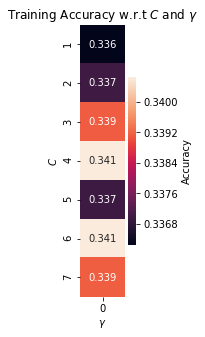

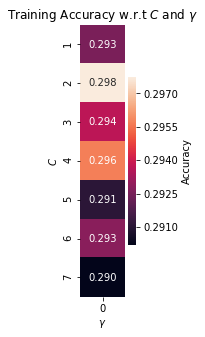

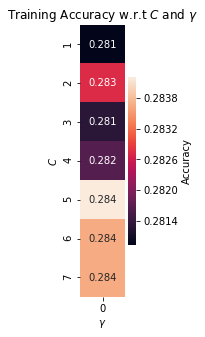

In [49]:
svm_acc1, svm_train_acc1, opt_c1 = svm(X_train1,Y_train1,X_test1,Y_test1)
svm_acc2, svm_train_acc2, opt_c2 = svm(X_train2,Y_train2,X_test2,Y_test2)
svm_acc3, svm_train_acc3, opt_c3 = svm(X_train3,Y_train3,X_test3,Y_test3)

In [50]:
d = {'Classifier Accuracy':[test_acc_KNN1,test_acc_KNN2,test_acc_KNN3,tree_acc1,tree_acc2,tree_acc3,svm_acc1,svm_acc2,svm_acc3],
     'Best Training Accuracy':[best_train_KNN1,best_train_KNN2,best_train_KNN3,tree_train_acc1,tree_train_acc2,tree_train_acc3,svm_train_acc1,svm_train_acc2,svm_train_acc3],
     'Optimal Feature':[C_KNN1,C_KNN2,C_KNN3,opt_D1,opt_D2,opt_D3,opt_c1,opt_c2,opt_c3]}

results = pd.DataFrame(data = d)


In [51]:
#results.index = {'KNN 20/80','KNN 50/50', 'KNN 80/20', 'Decision Tree 20/80', 'Decision Tree 50/50', 'Decision Tree 80/20', 'SVM 20/80', 'SVM 50/50', 'SVM 80/20'}

results.rename(index={0:'KNN 20/80'},inplace=True)
results.rename(index={1:'KNN 50/50'},inplace=True)
results.rename(index={2:'KNN 80/20'},inplace=True)

results.rename(index={3:'Decision Tree 20/80'},inplace=True)
results.rename(index={4:'Decision Tree 50/50'},inplace=True)
results.rename(index={5:'Decision Tree 80/20'},inplace=True)

results.rename(index={6:'SVM 20/80'},inplace=True)
results.rename(index={7:'SVM 50/50'},inplace=True)
results.rename(index={8:'SVM 80/20'},inplace=True)



In [52]:
results

,Classifier Accuracy,Best Training Accuracy,Optimal Feature
KNN 20/80,0.266088,0.459408,6
KNN 50/50,0.218750,0.473658,6
KNN 80/20,0.164740,0.416964,7
Decision Tree 20/80,0.292842,0.391279,4
Decision Tree 50/50,0.315972,0.370651,4
Decision Tree 80/20,0.300578,0.356727,4
SVM 20/80,0.272596,0.340642,4
SVM 50/50,0.266204,0.290213,7
SVM 80/20,0.254335,0.283656,6
